<a href="https://colab.research.google.com/github/Weedmastercrucifer/Neural-Networks-and-Fuzzy-Logic/blob/main/Assignment1Details/Assignment1_q1final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Assignment 1 Q1

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def cost_function(X,y,w): ###define cost function
    hypothesis = np.dot(X,w.T)  ###calculation of hypothesis for all instances
    J = (1/(2*len(y))) * np.sum((hypothesis - y) ** 2)  ####as mention in the class notes
    return J

In [ ]:
def batch_gradient_descent(X,y,w,alpha,iters):
    cost_hist = np.zeros(iters) # cost function for each iteration
    w_hist = np.zeros((iters,3)) # weights for each iteration
        #initalize our cost history list to store the cost function on every iteration
    for i in range(iters):
        hypothesis = np.dot(X,w.T)
        w = w - (alpha/len(y)) * np.dot(hypothesis - y, X)
        cost_hist[i] = cost_function(X,y,w)
        w_hist[i] = w
    return w, cost_hist, w_hist

In [ ]:
def minibatch_gradient_descent(X,y,w,alpha, iters, batch_size):
    cost_hist = np.zeros(iters)
    w_hist = np.zeros((iters,3)) # weights for each iteration
    for i in range(iters):
        rand_index = np.random.randint(len(y))
        ind_x = X[rand_index:rand_index+batch_size]
        ind_y = y[rand_index:rand_index+batch_size]
        w = w - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y))
        cost_hist[i] = cost_function(ind_x,ind_y,w)
        w_hist[i]= w
    return w, cost_hist, w_hist

In [ ]:
def stochastic_gradient_descent(X,y,w,alpha, iters):
    cost_hist = np.zeros(iters)
    w_hist = np.zeros((iters,3)) # weights for each iteration
    for i in range(iters):
        rand_index = np.random.randint(len(y))
        ind_x = X[rand_index:rand_index+1]
        ind_y = y[rand_index:rand_index+1]
        w = w - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
        cost_hist[i] = cost_function(ind_x,ind_y,w)
        w_hist[i] = w
    return w, cost_hist, w_hist

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Assignment1NNFL/Copy of data_q1.xlsx',header=0) ###loading dataset to colab

In [ ]:
# normalize the data
print(data)

     Feature 1  Feature 2  Output
0          1.5       4.97     2.2
1          2.0       4.97     2.2
2          3.0       4.97     2.2
3          4.0       4.97     2.2
4          1.5       4.97     2.2
..         ...        ...     ...
110        1.5       4.40     2.2
111        2.0       4.40     2.2
112        3.0       4.40     2.2
113        4.0       4.40     2.2
114        5.0       4.40     2.2

[115 rows x 3 columns]


In [ ]:
datan =data.values
X=datan[:,[0,1]]
m = X.shape[0] #no of examples
xmin = np.min(X, axis = 0)
xmax = np.max(X, axis = 0)
X = (X- xmin)/(xmax-xmin) #Normalization
pp = np.ones([m, 1]) # vector containg ones as all elements
X = np.append(pp,X, axis=1) #Column of ones

In [ ]:
X.shape

(115, 3)

In [ ]:
y=datan[:,2] #output
ymin = np.min(y, axis = 0)
ymax = np.max(y, axis = 0)
y = (y- ymin)/(ymax-ymin) #Normalisation

In [ ]:
w= np.zeros(X.shape[1]) ###weight initialization
print(w)

[0. 0. 0.]


In [ ]:
alpha=0.05
iters=1000
w_batch,cost_hist_batch,w_batch_hist = batch_gradient_descent(X,y,w,alpha,iters)

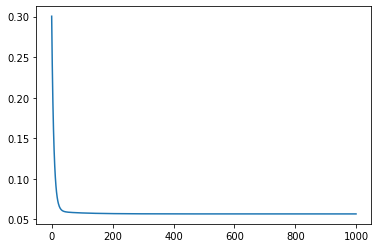

In [ ]:
plt.plot(range(iters),cost_hist_batch)
plt.show()

In [ ]:
print(w_batch)

[0.6170497  0.03470774 0.28441453]


In [ ]:
alpha=0.005
iters=1500
w_mini,cost_hist_mini,w_mini_hist = minibatch_gradient_descent(X,y,w,alpha,iters,10)

In [ ]:
print(w_mini)

[0.55233216 0.13733744 0.290135  ]


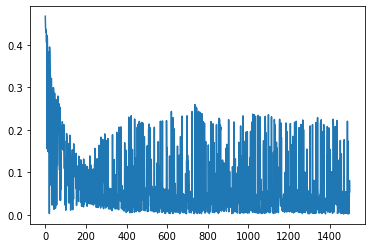

In [ ]:
plt.plot(range(iters),cost_hist_mini)
plt.show()

In [ ]:
alpha=0.1
iters=1500
w_stoch,cost_hist_stoch,w_stoch_hist = stochastic_gradient_descent(X,y,w, alpha, iters)

In [ ]:
print(w_stoch)

[ 0.62338874 -0.01394429  0.26949061]


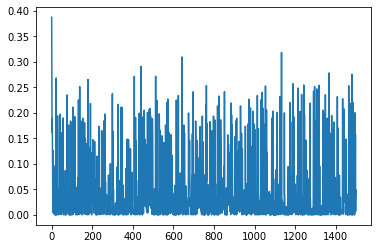

In [ ]:
plt.plot(range(iters),cost_hist_stoch)
plt.show()

In [ ]:
# w range
w1_batch_vals = np.linspace(w_batch[1]-1,w_batch[1]+1,100)
w2_batch_vals = np.linspace(w_batch[2]-1,w_batch[2]+1,100)
Z_Batch = np.zeros((len(w1_batch_vals), len(w2_batch_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in w1_batch_vals:
    for j in w2_batch_vals:
        t = np.array([0.6170497, i, j])# bias term of final iteration. can be any
        Z_Batch[c1, c2] = cost_function(X, y, t)
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize column

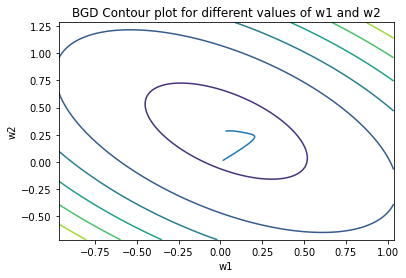

In [ ]:
plt.contour(w1_batch_vals, w2_batch_vals, Z_Batch)
plt.xlabel('w1'); plt.ylabel("w2")
plt.title("BGD Contour plot for different values of w1 and w2");
plt.plot(w_batch_hist[:, 1], w_batch_hist[:, 2]);

Text(0.5, 0, 'J')

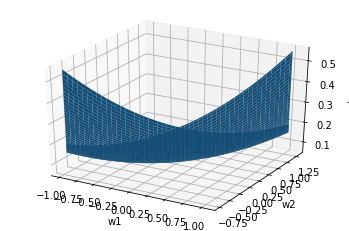

In [ ]:
cp_batch=plt.axes(projection='3d')
cp_batch.plot_surface(w1_batch_vals,w2_batch_vals,Z_Batch)#contour plot for J vs w1 vs w2
cp_batch.set_xlabel('w1')
cp_batch.set_ylabel('w2')
cp_batch.set_zlabel('J')

In [ ]:
# w range
w1_mini_vals = np.linspace(w_mini[1]-1,w_mini[1]+1,100)
w2_mini_vals = np.linspace(w_mini[2]-1,w_mini[2]+1,100)
Z_mini = np.zeros((len(w1_mini_vals), len(w2_mini_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in w1_mini_vals:
    for j in w2_mini_vals:
        t = np.array([0.54435017, i, j])
        Z_mini[c1, c2] = cost_function(X, y, t)
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

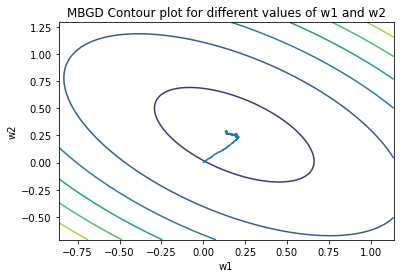

In [ ]:
plt.contour(w1_mini_vals, w2_mini_vals, Z_mini)
plt.xlabel('w1'); plt.ylabel("w2")
plt.title("MBGD Contour plot for different values of w1 and w2");
plt.plot(w_mini_hist[:, 1], w_mini_hist[:, 2]);

Text(0.5, 0, 'J')

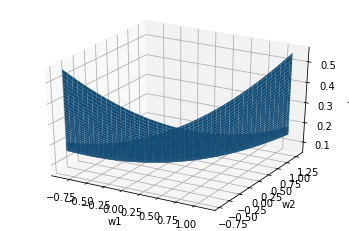

In [ ]:
cp_mini=plt.axes(projection='3d')
cp_mini.plot_surface(w1_mini_vals,w2_mini_vals,Z_mini)#contour plot for J vs w1 vs w2
cp_mini.set_xlabel('w1')
cp_mini.set_ylabel('w2')
cp_mini.set_zlabel('J')

In [ ]:
# w range
w1_stoch_vals = np.linspace(w_stoch[1]-1,w_stoch[1]+1,50)
w2_stoch_vals = np.linspace(w_stoch[2]-1,w_stoch[2]+1,50)
Z_stoch = np.zeros((len(w1_stoch_vals), len(w2_stoch_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in w1_stoch_vals:
    for j in w2_stoch_vals:
        t = np.array([0.53728678, i, j])
        Z_stoch[c1, c2] = cost_function(X, y, t)
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

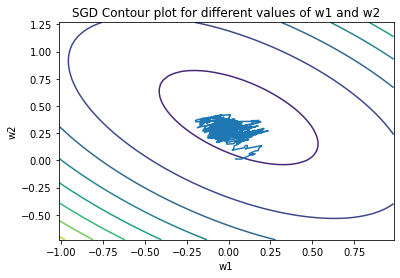

In [ ]:
plt.contour(w1_stoch_vals, w2_stoch_vals, Z_stoch)
plt.xlabel('w1'); plt.ylabel("w2")
plt.title("SGD Contour plot for different values of w1 and w2");
plt.plot(w_stoch_hist[:, 1], w_stoch_hist[:, 2]);

Text(0.09379629152477453, 0.012566320283548621, 'J')

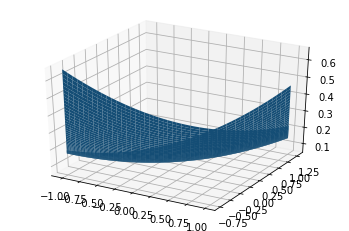

In [ ]:
cp_stoch=plt.axes(projection='3d')
cp_stoch.plot_surface(w1_stoch_vals,w2_stoch_vals,Z_stoch)#contour plot for J vs w1 vs w2
cp_mini.set_xlabel('w1')
cp_mini.set_ylabel('w2')
cp_mini.set_zlabel('J')